# Northern Gulf Data Analysis


##1. Mount Drive and Import Libs

In [1]:
!pip -q install plotly

In [5]:
!pip install pycaret==3.0

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Using cached pycaret-3.0.0-py3-none-any.whl.metadata (16 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached numpy-1.24.4.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/media/weverton/D/Documentos/Faculdade/TCC/project/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/media/weverton/D/Documentos/Faculdade/TCC/project/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
             

In [3]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Using cached pydantic-2.10.4-py3-none-any.whl.metadata (29 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'pycaret'

## 2. Explore the data

In [ ]:
data_path = "/../data/extracted_points.csv"

In [ ]:
raw_pixel_northern_gulf = pd.read_csv(data_path)

In [ ]:
profile = ProfileReport(raw_pixel_northern_gulf)
profile.to_notebook_iframe()

In [ ]:
# Show all sheets
raw_pixel_northern_gulf.head()

In [ ]:
raw_pixel_northern_gulf.info()

In [ ]:
raw_pixel_northern_gulf.describe()

##IET

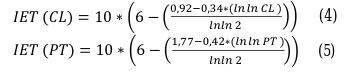

> SERBETO, Larissa Ferreira et al. Determinação da Concentração de Clorofila-a por Sensoriamento Remoto no Reservatório de Chapéu d’Úvas (Mg), Brasil. Revista Brasileira de Geografia Física, v. 14, n. 6, p. 3561-3576, 2021.

> [SETESB - Companhia ambiental do estado de São Paulo: IET](https://www.cetesb.sp.gov.br/aguas-interiores/wp-content/uploads/sites/12/2013/11/04.pdf)





In [ ]:
import math

def iet_chla(chla):
    return 10 * (6 - ((0.92 - 0.34 * math.log(chla)) / math.log(2)))

def iet_tp(tp):
    return 10 * (6 - ((1.77 - 0.42 * math.log(tp)) / math.log(2)))

def iet_total(chla, tp):
    return (iet_chla(chla) + iet_tp(tp)) / 2

In [ ]:
raw_pixel_northern_gulf['iet_CHLA'] = raw_pixel_northern_gulf['ChlA'].apply(iet_chla)
# raw_mobile_bay_data['iet_tp'] = raw_mobile_bay_data['TP'].apply(iet_tp)
# raw_mobile_bay_data['iet'] = raw_mobile_bay_data.apply(lambda row: iet_total(row['ChlA'], row['TP']), axis=1)

In [ ]:
raw_pixel_northern_gulf.info()

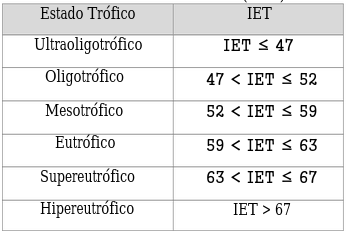

> SERBETO, Larissa Ferreira et al. Determinação da Concentração de Clorofila-a por Sensoriamento Remoto no Reservatório de Chapéu d’Úvas (Mg), Brasil. Revista Brasileira de Geografia Física, v. 14, n. 6, p. 3561-3576, 2021.
---

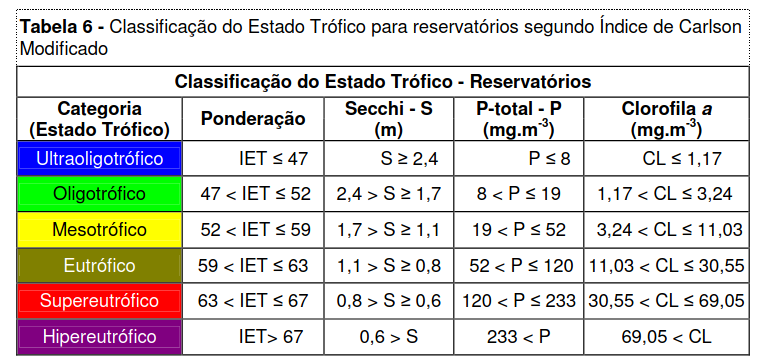

> [SETESB - Companhia ambiental do estado de São Paulo: IET](https://www.cetesb.sp.gov.br/aguas-interiores/wp-content/uploads/sites/12/2013/11/04.pdf)
---


* 1 = Ultraoligotrófico
* 2 = Oligotrófico
* 3 = Mesotrófico
* 4 = Eutrófico
* 5 = Supereutrófico
* 6 = Hipereutrófico

In [ ]:
bins = [-float('inf'), 47, 52, 59, 63, 67, float('inf')]
labels = [1, 2, 3, 4, 5, 6]

# TS: Trophic State
raw_pixel_northern_gulf['TS'] = pd.cut(raw_pixel_northern_gulf['iet_CHLA'], bins=bins, labels=labels, right=True)

In [ ]:
raw_pixel_northern_gulf.info()

## Preprocessing


#### Selecting the experiment's fields


In [ ]:
experiment1_data = raw_pixel_northern_gulf.drop(columns=['lat', 'lon','QA_PIXEL', 'QA_PIXEL', 'date', 'scene_id', "name", "Unnamed: 0", "ChlA", "iet_CHLA"])

In [ ]:
experiment1_data.info()

In [ ]:
experiment1_corr = experiment1_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(experiment1_corr,
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",)

In [ ]:
 experiment1_data['TS'].value_counts()

In [ ]:
class_counts = experiment1_data['TS'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Classe de Estado Trófico')
plt.ylabel('Número de Amostras')
plt.title('Balanceamento das Classes de Estado Trófico')
plt.show()


In [ ]:
experiment1_data.plot(kind="density",
          subplots=True,
          sharex=False,
          layout=(10,4),
          figsize=(15,15))
plt.tight_layout()
plt.show()

#### Split and normalize the data

In [ ]:
# Get the default field
X, y = experiment1_data.drop(columns=['TS']), experiment1_data['TS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data only
scaler.fit(X_train)

# Transform both the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames (optional but recommended)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"X_train scaled: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test scaled: {X_test.shape}, y_test: {y_test.shape}")

### Decicion Tree


## PyCaret

In [ ]:
train_test_pycaret = experiment1_data.groupby('TS').filter(lambda x : len(x) > 1)

In [ ]:
train_test_pycaret['TS'].value_counts()

In [ ]:
from pycaret.classification import *
clf1 = setup(data=train_test_pycaret,
             target = 'TS',
             normalize=True,
             normalize_method='minmax',
             group_features=['SR_B2','SR_B3', 'SR_B1', 'SR_B4', 'SR_B5', 'SR_B7'],
             session_id=123)

In [ ]:
X_test_pycaret = get_config('X_test_transformed')
y_test_pycaret = get_config('y_test_transformed')

y_train = get_config('y_train_transformed')

In [ ]:
class_counts_test = pd.Series(y_test_pycaret).value_counts(normalize=True) * 100
class_counts_test

In [ ]:
class_counts_train = pd.Series(y_train).value_counts(normalize=True) * 100
class_counts_train

In [ ]:
best_model = compare_models()

In [ ]:
print(best_model)

In [ ]:
evaluate_model(best_model)

In [ ]:
predictions_df = predict_model(best_model, data=X_test_pycaret)

In [ ]:
predictions_df.head()

In [ ]:
# Classification report
print(classification_report(y_test_pycaret, predictions_df['prediction_label']))